<a href="https://colab.research.google.com/github/YoungVoid/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

Author: Nian Vrey

##Project Overview

Predicting sales of various products to understand the properties of products and outlets that play crucial roles in increasing sales. This project is done as part of the Data Science Course by Umuzi.

## Load and Inspect Data


### Data Dictionary for sales_predictions_2023.csv

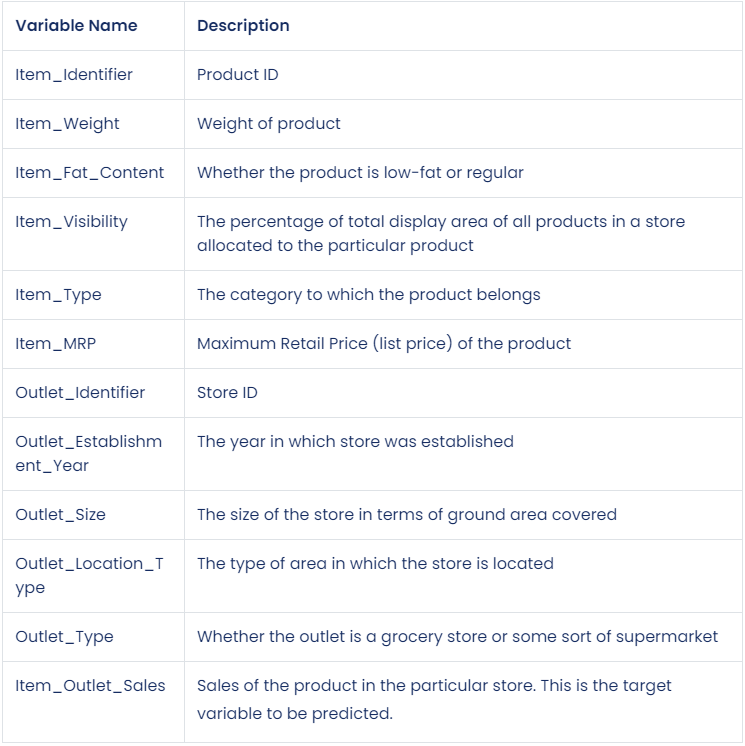

### Data Setup
Importing libraries, then creating and checking the DataFrame

In [88]:
# Imports
import pandas as pd
from missingno import matrix

In [89]:
# Read initial csv into DataFrame
initial_data_filepath = 'https://raw.githubusercontent.com/YoungVoid/Prediction-of-Product-Sales/main/sales_predictions_2023.csv'

df_sales_predictions = pd.read_csv(initial_data_filepath)

In [90]:
# Check DataFrame Info - 8523 entries, 12 Columns
df_sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [91]:
# First 5 Rows
df_sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [92]:
df_sales_predictions.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV35            19.500       Low Fat           0.128182         Breads        156.1314  OUT035             2004                       Small        Tier 2                Supermarket Type1  2792.3652            1
FDV25            5.905        low fat           0.045614         Canned        221.5456  OUT013             1987                       High         Tier 3                Supermarket Type1  6852.4136            1
                              Low Fat           0.045838         Canned        222.5456  OUT018             2009                       Medium       Tier 3   

## Clean Data

Checks -


1.   Check Data Types - all dtypes from .info() seems correct
2.   Check Duplicates - .duplicated().sum() returns 0 duplicated rows
3.   Check Unique Values - No columns have 100% Unique Values
4.   Check Missing Values - Columns Item_Weight(1463) and Outlet_Size(2410). Placeholders Inserted.
5.   Inconsistencies - Found and Fixed


In [93]:
# Check how many duplicated rows there are
df_sales_predictions.duplicated().sum()

0

In [94]:
# Check Unique Values %
unique_counts = df_sales_predictions.nunique()
unique_counts / len(df_sales_predictions) * 100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [95]:
# Check Missing Values
df_sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Address Item_Weight Missing Values

In [96]:
# Check Values
df_sales_predictions['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [97]:
# Check Missing Count Before Fix
df_sales_predictions['Item_Weight'].isna().sum()

1463

In [98]:
# Insert Placeholder Values -> -1
df_sales_predictions['Item_Weight'] = df_sales_predictions['Item_Weight'].fillna(-1)

In [99]:
# Check Missing Count After Fix
df_sales_predictions['Item_Weight'].isna().sum()

0

### Address Outlet_Size Missing Values

In [100]:
# Check Values
df_sales_predictions['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [101]:
# Check Missing Count Before Fix
df_sales_predictions['Outlet_Size'].isna().sum()

2410

In [102]:
# Insert Placeholder Values -> MISSING
df_sales_predictions['Outlet_Size'] = df_sales_predictions['Outlet_Size'].fillna('MISSING')

In [103]:
# Check Missing Count After Fix
df_sales_predictions['Outlet_Size'].isna().sum()

0

In [104]:
# Confirm that there are no more missing values via pandas sum
df_sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

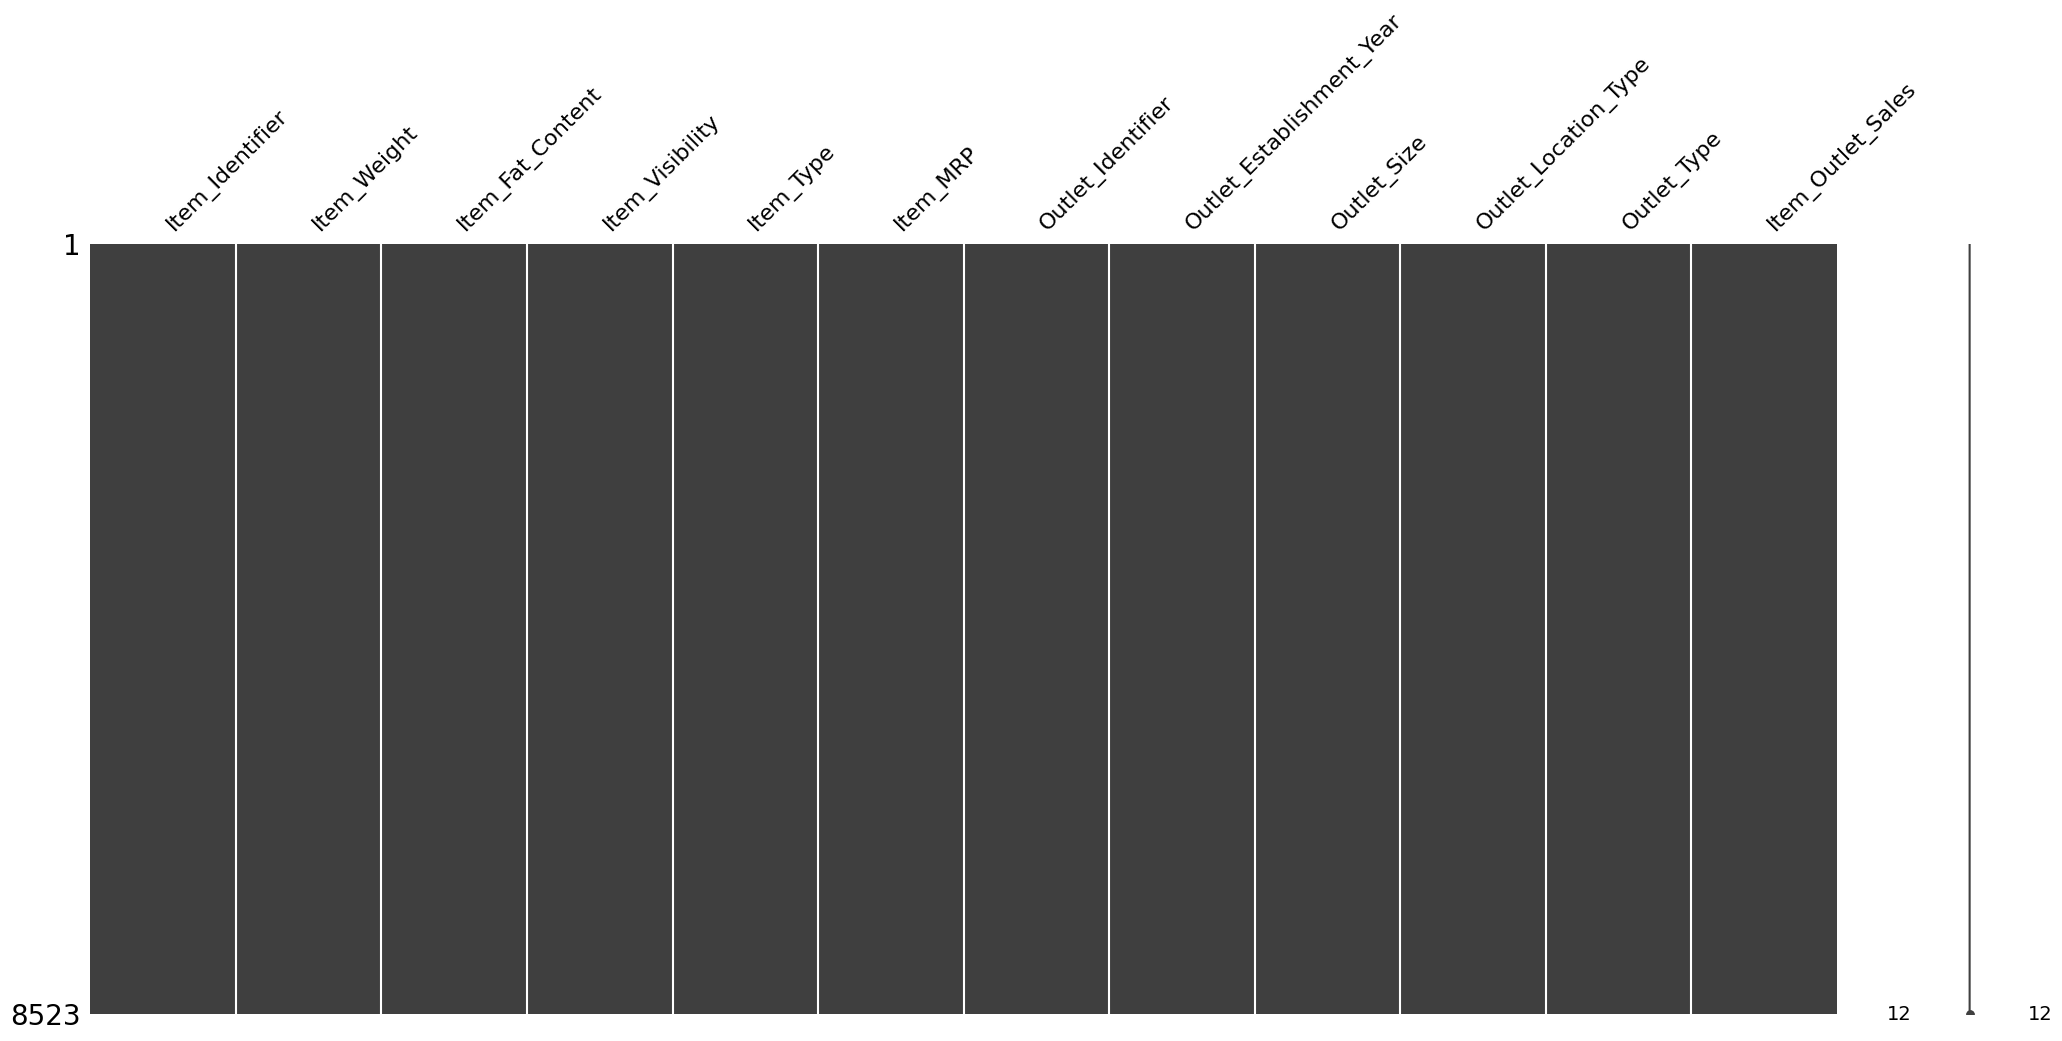

In [105]:
# Confirm that there are no more missing values via missingno.matrix
matrix(df_sales_predictions)

### Checking and Fixing Inconsistent Values

Problems Found:

Item_Fat_Content

*   'LF' to become 'Low Fat'
*   'low fat' to become 'Low Fat'
*   'reg' to become 'Regular'




In [106]:
categorical_columns = df_sales_predictions.select_dtypes('object').columns
df_sales_predictions[categorical_columns]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,MISSING,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [107]:
# Check every categorical column for potential inconsistent data
for catcol in categorical_columns:
  print(f'*** {catcol} ***')
  print(df_sales_predictions[catcol].value_counts(),'\n')

*** Item_Identifier ***
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

*** Item_Fat_Content ***
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

*** Item_Type ***
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

*** Outlet_Identifier ***
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018  

In [108]:
# Check Inconsistent Data Counts Before Fix
df_sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [109]:
# Fix Inconsistent Data
df_sales_predictions['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)

In [110]:
# Check Inconsistent Data Counts After Fix
df_sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Exploratory Data Analysis

In [111]:
numeric_columns = df_sales_predictions.select_dtypes('number').columns

In [112]:
df_sales_predictions[numeric_columns]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [113]:
# Loop through every numeric column and give the min, max and mean.
# If the column is 'Item_Weight', then we need to account for the -1 Placeholders
# we added. A Filter has been created and applied in that scenario. The filter
# doesn't need to be applied for the other columns, so we leave them as is
for numcol in numeric_columns:
  if numcol == 'Item_Weight':
    filter_Placeholders = df_sales_predictions[numcol] == -1
    df = df_sales_predictions.loc[~filter_Placeholders]
  else:
    df = df_sales_predictions
  print(f'*** {numcol} *** ')
  print(f'Min: {df[numcol].min()}')
  print(f'Max: {df[numcol].max()}')
  print(f'Mean: {df[numcol].mean()}','\n')

*** Item_Weight *** 
Min: 4.555
Max: 21.35
Mean: 12.857645184135977 

*** Item_Visibility *** 
Min: 0.0
Max: 0.328390948
Mean: 0.06613202877895108 

*** Item_MRP *** 
Min: 31.29
Max: 266.8884
Mean: 140.9927819781767 

*** Outlet_Establishment_Year *** 
Min: 1985
Max: 2009
Mean: 1997.8318667135984 

*** Item_Outlet_Sales *** 
Min: 33.29
Max: 13086.9648
Mean: 2181.288913575032 



In [114]:
# Alternative way of doing the above, using .describe() to get even more stats.
for numcol in numeric_columns:
  if numcol == 'Item_Weight':
    filter_Placeholders = df_sales_predictions[numcol] == -1
    df = df_sales_predictions.loc[~filter_Placeholders]
  else:
    df = df_sales_predictions
  print(f'*** {numcol} *** ')
  print(df[numcol].describe(),'\n')

*** Item_Weight *** 
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64 

*** Item_Visibility *** 
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64 

*** Item_MRP *** 
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64 

*** Outlet_Establishment_Year *** 
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64 

*** Item_Outlet_Sales *** 
count     8523.000000
mean      2181.288914

## Feature Inspection